
### Part 1)
- Load the breast cancer dataset using datasets.load_breast_cancer()
- Use scatter plots to look at the data. You can select two features for x and y axes at a time and color the samples according to their classes. You are not expected to try all pairs, which would be too many. But please show a few examples. 
- Also use box plots to look at the data. Please show that you are able to examine some features (not all them are necessary).
- Create a training and test set (with shuffling).
- Train a **decision tree classifier** using the training set.
- What are the top 5 most important (discriminative) features?
- Train a **logistic regression model** using the training set.
- Which model (DT or LR) performed better on the test set? Note: You can use score() method of built-in classifiers to compare.


In [1]:
import pandas as pd
import numpy as np
from sklearn import datasets
from matplotlib import pyplot
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.utils import shuffle

In [2]:
# load the dataset
data = datasets.load_breast_cancer()
print(data['DESCR'][:1482] + "\n...")

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [3]:
# change dataset pd dataframe and print first 5 rows
df = pd.DataFrame(data=np.c_[data['data'], data['target']],columns= list(data['feature_names']) + ['target'])
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


In [4]:
# shuffle the data and print first 5 rows
df=shuffle(pd.DataFrame(data=np.c_[data['data'], data['target']],columns= list(data['feature_names']) + ['target']))
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
277,18.81,19.98,120.90,1102.0,0.08923,0.05884,0.08020,0.05843,0.1550,0.04996,...,24.30,129.00,1236.0,0.12430,0.1160,0.22100,0.12940,0.2567,0.05737,0.0
338,10.05,17.53,64.41,310.8,0.10070,0.07326,0.02511,0.01775,0.1890,0.06331,...,26.84,71.98,384.0,0.14020,0.1402,0.10550,0.06499,0.2894,0.07664,1.0
402,12.96,18.29,84.18,525.2,0.07351,0.07899,0.04057,0.01883,0.1874,0.05899,...,24.61,96.31,621.9,0.09329,0.2318,0.16040,0.06608,0.3207,0.07247,1.0
274,17.93,24.48,115.20,998.9,0.08855,0.07027,0.05699,0.04744,0.1538,0.05510,...,34.69,135.10,1320.0,0.13150,0.1806,0.20800,0.11360,0.2504,0.07948,0.0
169,14.97,16.95,96.22,685.9,0.09855,0.07885,0.02602,0.03781,0.1780,0.05650,...,23.00,104.60,793.7,0.12160,0.1637,0.06648,0.08485,0.2404,0.06428,1.0


In [5]:
# dataset shape
df.shape

(569, 31)

<AxesSubplot:xlabel='mean area', ylabel='mean smoothness'>

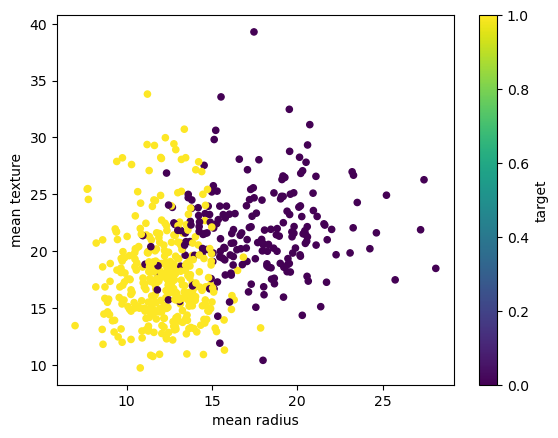

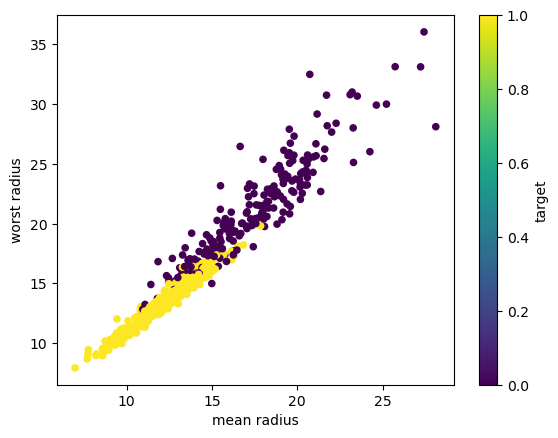

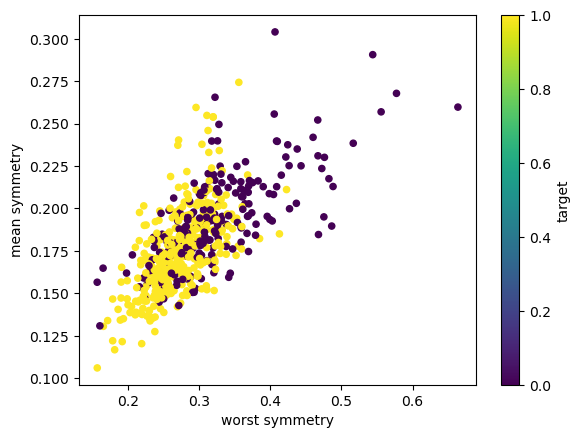

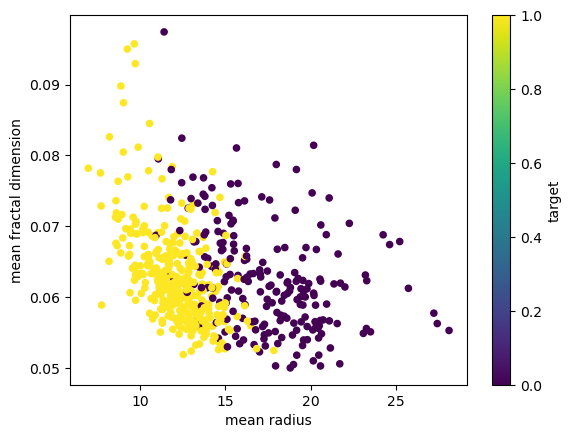

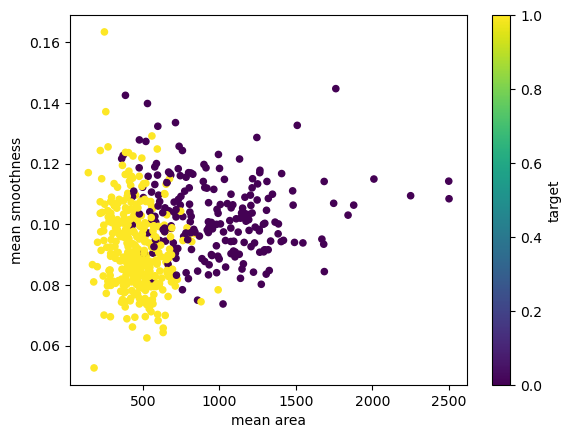

In [6]:
#Use scatter plots to look at the data
df.plot.scatter(x='mean radius',y='mean texture',s=20,c='target',colormap='viridis')
df.plot.scatter(x='mean radius',y='worst radius',s=20,c='target',colormap='viridis')
df.plot.scatter(x='worst symmetry',y='mean symmetry',s=20,c='target',colormap='viridis')
df.plot.scatter(x='mean radius',y='mean fractal dimension',s=20,c='target',colormap='viridis')
df.plot.scatter(x='mean area',y='mean smoothness',s=20,c='target',colormap='viridis')

<AxesSubplot:>

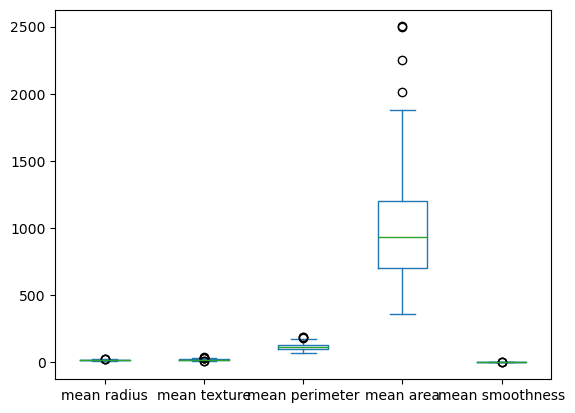

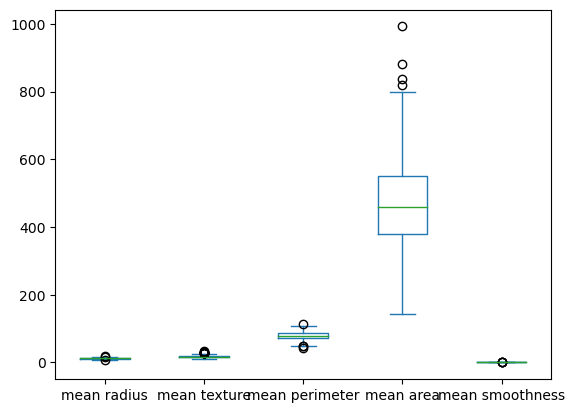

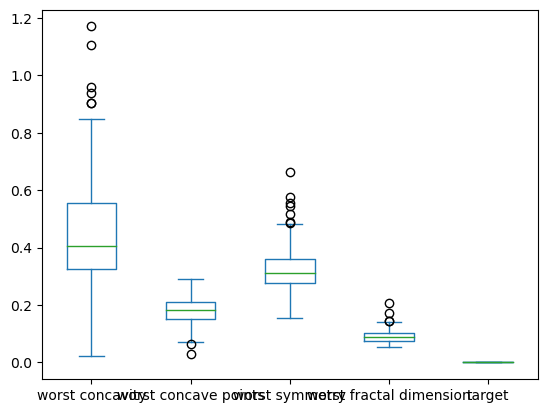

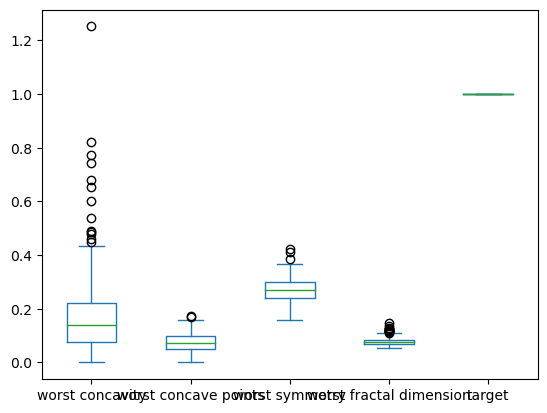

In [7]:
# use box plots to look at the data. Please show that you are able to examine some features (not all them are necessary).
df.iloc[:, : 5][df['target']==0].plot.box()
df.iloc[:, : 5][df['target']==1].plot.box()
df.iloc[:, 26 : ][df['target']==0].plot.box()
df.iloc[:, 26 : ][df['target']==1].plot.box()

In [9]:
# Create a training and test set (with shuffling).
train_df = df.iloc[0:228]
test_df = df.iloc[228:]
train_df.shape
test_df.shape

(341, 31)

In [10]:
# Train a decision tree classifier using the training set
tree = DecisionTreeClassifier(max_depth=10)
tree.fit(train_df.drop('target', axis=1), train_df['target'])
print(sum(tree.predict(train_df.drop('target',axis=1))==train_df['target']), "/", len(train_df['target']))
print(sum(tree.predict(test_df.drop('target', axis=1))==test_df['target']), "/", len(test_df['target']))

228 / 228
309 / 341


/Users/tunceratac/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  warnings.warn(
/Users/tunceratac/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  warnings.warn(
/Users/tunceratac/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  warnings.warn(


In [11]:
# test set confusion matrix 
confusion_matrix(tree.predict(test_df.drop('target',axis=1)),test_df['target'])

/Users/tunceratac/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  warnings.warn(


array([[114,  20],
       [ 12, 195]])

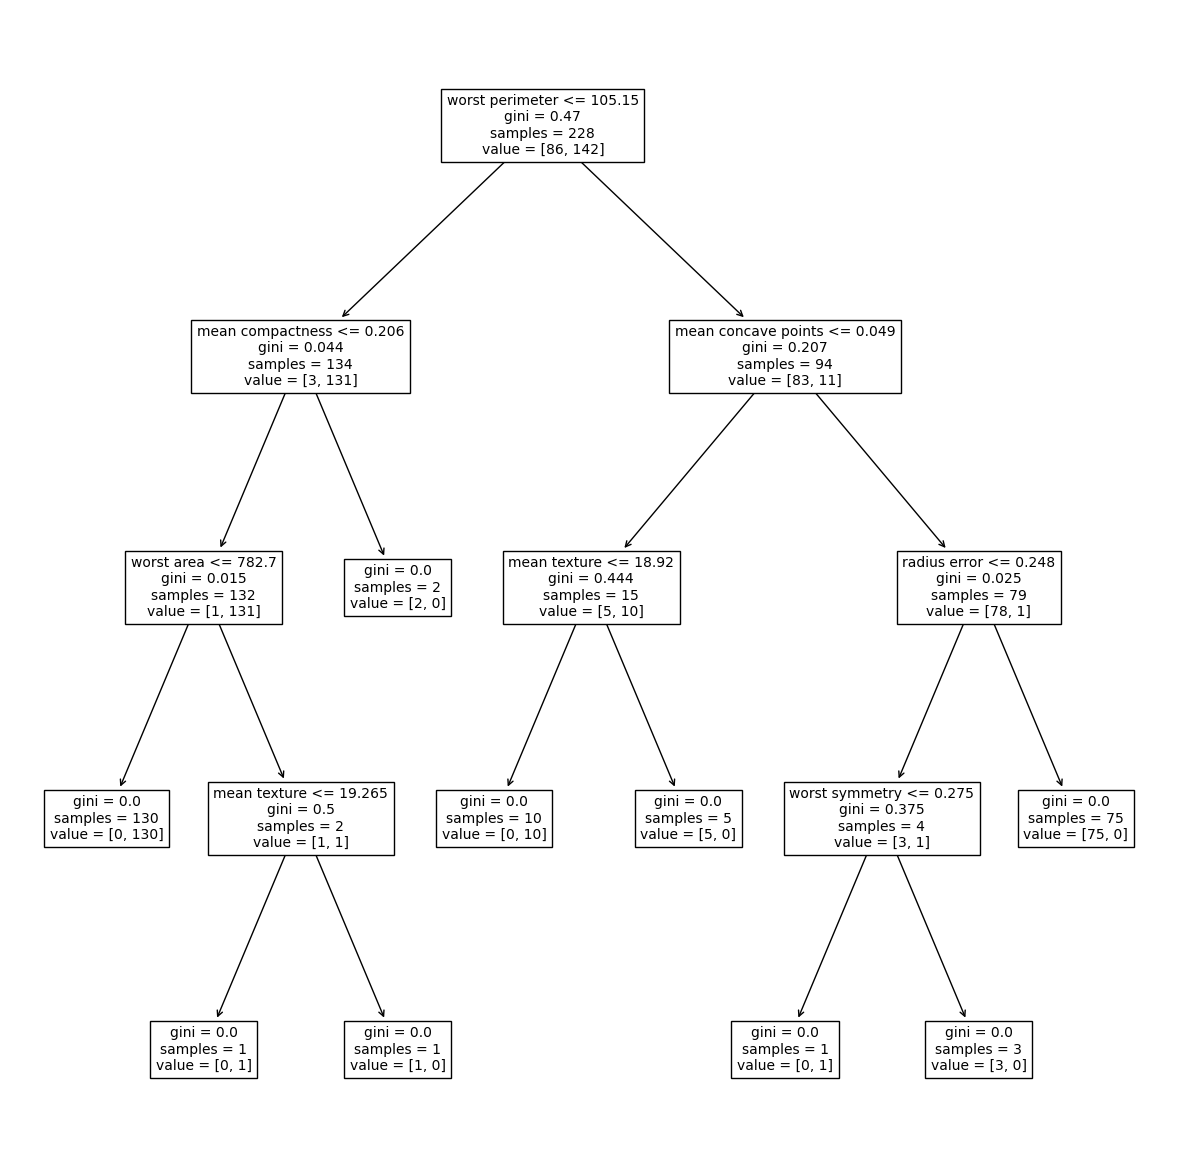

In [12]:
# plot tree
from sklearn import tree as tr
pyplot.figure(figsize=(15,15))
tr.plot_tree(tree, feature_names=data['feature_names'], fontsize=10)
pyplot.show()


In [13]:
# the top 5 most important (discriminative) features
df = pd.DataFrame({'Feature_names':list(data['feature_names']), 'Importances':tree.feature_importances_})
df.sort_values(by='Importances', ascending=False).head()

,Feature_names,Importances
22,worst perimeter,0.763905
7,mean concave points,0.100671
1,mean texture,0.071569
5,mean compactness,0.036228
28,worst symmetry,0.014003


In [14]:
# train a logistic regression model using the training set
lor = LogisticRegression(C=0.01, max_iter=1000)
lor.fit(train_df.drop(['target'], axis=1),train_df['target'])
print(sum(lor.predict(train_df.drop('target', axis=1))==train_df['target']), "/",len(train_df['target']))
print(sum(lor.predict(test_df.drop('target', axis=1))==test_df['target']), "/", len(test_df['target']))

223 / 228
317 / 341


/Users/tunceratac/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  warnings.warn(
/Users/tunceratac/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  warnings.warn(
/Users/tunceratac/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  warnings.warn(


In [15]:
# Which model (DT or LR) performed better on the test set?
print("Logistic Score:",lor.score(test_df.drop(['target'], axis=1), test_df['target']))
print("Tree Score:",tree.score(test_df.drop(['target'], axis=1), test_df['target']))

Logistic Score: 0.9296187683284457
Tree Score: 0.906158357771261


/Users/tunceratac/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  warnings.warn(
/Users/tunceratac/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  warnings.warn(


### Part 2)

- Get *winequality_white.csv* which uploaded with the Homework file.

- Last column (quality) is the target variable.

- Train a decision tree regressor using the training set. Try different 'min_samples_split' and 'max_depth' parameters. Which ones worked best on the test set? What is the MSE on the test set with the best parameters.

In [16]:
# read winequality_white.csv and print first 5 rows
df = pd.read_csv('winequality_white.csv',sep=';')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [17]:
# shuffle the data and print first 5 rows
df=shuffle(df)
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
4849,6.4,0.33,0.44,8.9,0.055,52.0,164.0,0.99488,3.10,0.48,9.6,5
2108,7.4,0.18,0.36,13.1,0.056,72.0,163.0,1.00000,3.42,0.35,9.1,6
1784,6.7,0.24,0.29,6.8,0.038,54.0,127.0,0.99320,3.33,0.46,11.6,7
3828,6.3,0.40,0.24,5.1,0.036,43.0,131.0,0.99186,3.24,0.44,11.3,6
439,6.2,0.35,0.04,1.2,0.060,23.0,108.0,0.99340,3.26,0.54,9.2,5


In [18]:
# dataset shape
df.shape

(4898, 12)

In [19]:
# Create a training and test set (with shuffling).
train_df = df.iloc[0:1960]
test_df = df.iloc[1960:]
print(train_df.shape)
print(test_df.shape)

(1960, 12)
(2938, 12)


In [20]:
# Train a decision tree regressor using the training set.Try different 'min_samples_split' and 'max_depth' parameters. 
tree_reg = DecisionTreeRegressor(max_depth=30, min_samples_split=3)
tree_reg.fit(train_df.drop('quality',axis=1),train_df['quality'])
tree_reg.score(test_df.drop('quality',axis=1), test_df['quality'])

-0.08327159541306961

In [21]:
# Train a decision tree regressor using the training set.Try different 'min_samples_split' and 'max_depth' parameters. 
tree_reg = DecisionTreeRegressor(max_depth=30, min_samples_split=5)
tree_reg.fit(train_df.drop('quality',axis=1),train_df['quality'])
tree_reg.score(test_df.drop('quality',axis=1), test_df['quality'])

-0.0533387299013639

In [22]:
# Train a decision tree regressor using the training set.Try different 'min_samples_split' and 'max_depth' parameters. 
tree_reg = DecisionTreeRegressor(max_depth=10, min_samples_split=3)
tree_reg.fit(train_df.drop('quality',axis=1),train_df['quality'])
tree_reg.score(test_df.drop('quality',axis=1), test_df['quality'])

0.06894603998196858

In [23]:
# Train a decision tree regressor using the training set.Try different 'min_samples_split' and 'max_depth' parameters. 
tree_reg = DecisionTreeRegressor(max_depth=10, min_samples_split=10)
tree_reg.fit(train_df.drop('quality',axis=1),train_df['quality'])
tree_reg.score(test_df.drop('quality',axis=1), test_df['quality'])

0.062341624671860885

In [24]:
# Train a decision tree regressor using the training set.Try different 'min_samples_split' and 'max_depth' parameters. 
tree_reg = DecisionTreeRegressor(max_depth=55, min_samples_split=5)
tree_reg.fit(train_df.drop('quality',axis=1),train_df['quality'])
tree_reg.score(test_df.drop('quality',axis=1), test_df['quality'])

-0.04349129416578967

In [25]:
# Train a decision tree regressor using the training set.Try different 'min_samples_split' and 'max_depth' parameters. 
tree_reg = DecisionTreeRegressor(max_depth=5, min_samples_split=5)
tree_reg.fit(train_df.drop('quality',axis=1),train_df['quality'])
tree_reg.score(test_df.drop('quality',axis=1), test_df['quality'])

0.20569522448824473

In [26]:
# Train a decision tree regressor using the training set.Try different 'min_samples_split' and 'max_depth' parameters. 
# Best Score
tree_reg = DecisionTreeRegressor(max_depth=7, min_samples_split=62)
tree_reg.fit(train_df.drop('quality',axis=1),train_df['quality'])
tree_reg.score(test_df.drop('quality',axis=1), test_df['quality'])

0.19373089627964546

In [27]:
# the MSE on the test set with the best parameters.
mean_squared_error(tree_reg.predict(test_df.drop('quality',axis=1)), test_df['quality'])

0.6392211745532518